# The research question is To predict the Horsepower based on Displacement,Acceleration, Miles_per_Gallon,Weight_in_kg

## Importing all the libaries we are going to use

In [248]:
import pandas as pd
import numpy as np
import json
import urllib
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor as AdaBoost
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Webscrapping the data , renaming and converting measurements

In [2]:
url = "https://raw.githubusercontent.com/vega/vega/master/docs/data/cars.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())
df = pd.DataFrame(data)
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [3]:
url = "https://raw.githubusercontent.com/vega/vega/master/docs/data/cars.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())
df = pd.DataFrame(data)
df.rename({'Weight_in_lbs': 'Weight_in_Kg', 'Miles_per_Gallon': 'Kilometers_per_Liter'}, axis=1, inplace=True)
df['Kilometers_per_Liter'] = df['Kilometers_per_Liter']*0.425144
df['Weight_in_Kg'] = df['Weight_in_Kg']*0.45359237
df

,Name,Kilometers_per_Liter,Cylinders,Displacement,Horsepower,Weight_in_Kg,Acceleration,Year,Origin
0,chevrolet chevelle malibu,7.652592,8,307.0,130.0,1589.387664,12.0,1970-01-01,USA
1,buick skylark 320,6.377160,8,350.0,165.0,1675.116622,11.5,1970-01-01,USA
2,plymouth satellite,7.652592,8,318.0,150.0,1558.543383,11.0,1970-01-01,USA
3,amc rebel sst,6.802304,8,304.0,150.0,1557.182606,12.0,1970-01-01,USA
4,ford torino,7.227448,8,302.0,140.0,1564.440084,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,11.478888,4,140.0,86.0,1265.522712,15.6,1982-01-01,USA
402,vw pickup,18.706336,4,97.0,52.0,966.151748,24.6,1982-01-01,Europe
403,dodge rampage,13.604608,4,135.0,84.0,1040.994489,11.6,1982-01-01,USA
404,ford ranger,11.904032,4,120.0,79.0,1190.679971,18.6,1982-01-01,USA


# Encoding categorial variables

In [4]:
df.drop_duplicates()
cylinders_encoded = pd.get_dummies(df['Cylinders'],prefix='Cylinders')
df.drop('Cylinders' , axis=1, inplace=True)

In [5]:
df=df.join(cylinders_encoded)
df

,Name,Kilometers_per_Liter,Displacement,Horsepower,Weight_in_Kg,Acceleration,Year,Origin,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
0,chevrolet chevelle malibu,7.652592,307.0,130.0,1589.387664,12.0,1970-01-01,USA,0,0,0,0,1
1,buick skylark 320,6.377160,350.0,165.0,1675.116622,11.5,1970-01-01,USA,0,0,0,0,1
2,plymouth satellite,7.652592,318.0,150.0,1558.543383,11.0,1970-01-01,USA,0,0,0,0,1
3,amc rebel sst,6.802304,304.0,150.0,1557.182606,12.0,1970-01-01,USA,0,0,0,0,1
4,ford torino,7.227448,302.0,140.0,1564.440084,10.5,1970-01-01,USA,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,11.478888,140.0,86.0,1265.522712,15.6,1982-01-01,USA,0,1,0,0,0
402,vw pickup,18.706336,97.0,52.0,966.151748,24.6,1982-01-01,Europe,0,1,0,0,0
403,dodge rampage,13.604608,135.0,84.0,1040.994489,11.6,1982-01-01,USA,0,1,0,0,0
404,ford ranger,11.904032,120.0,79.0,1190.679971,18.6,1982-01-01,USA,0,1,0,0,0


# Information about the Data
#### Aceleration: Amount of time it takes to reach 96.56 km/h from 0 km/h, in seconds.
#### Cylinders: Number of cylinders in the car's engine.
#### Displacement: The engine volume, in cubic centimeter.
#### Horsepower: The amount of power the engine produce, in horsepower.
#### Kilometers_per_liter: the fuel economy of the vehicle, in kilometers_per_liter.
#### Name: vehicle company and model.
#### Origin: origin of the company.
#### Year: Year of production.

#### *There is no turbo in the engines of these vehicles.

## Deviding the data to train and test sets

In [6]:
train_set, test_set = train_test_split(df,test_size=0.2, random_state=23 ,shuffle=True)

## cleaning the train_set

#### erasing duplicates rows(duplicate cars)

In [7]:
train_set.drop_duplicates()
train_set.drop(['Name', 'Origin', 'Year'],axis=1,inplace=True)

In [8]:
train_set

,Kilometers_per_Liter,Displacement,Horsepower,Weight_in_Kg,Acceleration,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
266,8.842995,200.0,85.0,1392.528576,16.7,0,0,0,1,0
74,4.676584,429.0,208.0,2101.493450,11.0,0,0,0,0,1
375,11.904032,112.0,88.0,1181.608124,19.6,0,1,0,0,0
294,7.014876,351.0,138.0,1793.957823,13.2,0,0,0,0,1
385,13.179464,91.0,68.0,893.576969,17.6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
237,6.589732,350.0,170.0,1889.212221,11.4,0,0,0,0,1
31,4.251440,360.0,215.0,2093.328788,14.0,0,0,0,0,1
40,8.077736,232.0,100.0,1194.762303,13.0,0,0,0,1,0
230,6.589732,318.0,145.0,1877.872412,13.7,0,0,0,0,1


#### checking for null values in the data and erasing those rows

In [9]:
train_set.isnull().sum()

Kilometers_per_Liter    6
Displacement            0
Horsepower              5
Weight_in_Kg            0
Acceleration            0
Cylinders_3             0
Cylinders_4             0
Cylinders_5             0
Cylinders_6             0
Cylinders_8             0
dtype: int64

In [10]:
train_set = train_set.dropna(how='any',axis=0)
train_set.isnull().sum()

Kilometers_per_Liter    0
Displacement            0
Horsepower              0
Weight_in_Kg            0
Acceleration            0
Cylinders_3             0
Cylinders_4             0
Cylinders_5             0
Cylinders_6             0
Cylinders_8             0
dtype: int64

In [11]:
train_set.head()

,Kilometers_per_Liter,Displacement,Horsepower,Weight_in_Kg,Acceleration,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
266,8.842995,200.0,85.0,1392.528576,16.7,0,0,0,1,0
74,4.676584,429.0,208.0,2101.493450,11.0,0,0,0,0,1
375,11.904032,112.0,88.0,1181.608124,19.6,0,1,0,0,0
294,7.014876,351.0,138.0,1793.957823,13.2,0,0,0,0,1
385,13.179464,91.0,68.0,893.576969,17.6,0,1,0,0,0


## cleaning the test_set

#### erasing duplicates rows(duplicate cars)

In [12]:
test_set.drop_duplicates()

,Name,Kilometers_per_Liter,Displacement,Horsepower,Weight_in_Kg,Acceleration,Year,Origin,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
286,honda Accelerationord lx,12.541748,98.0,68.0,968.419710,16.6,1978-01-01,Japan,0,1,0,0,0
217,toyota mark ii,8.077736,156.0,108.0,1329.025644,15.5,1976-01-01,Japan,0,0,0,1,0
401,ford mustang gl,11.478888,140.0,86.0,1265.522712,15.6,1982-01-01,USA,0,1,0,0,0
281,audi 5000,8.630423,131.0,103.0,1283.666407,15.9,1978-01-01,Europe,0,0,1,0,0
108,plymouth duster,9.778312,198.0,95.0,1317.232242,16.0,1973-01-01,USA,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,ford thunderbird,6.802304,351.0,149.0,1966.322924,14.5,1977-01-01,USA,0,0,0,0,1
43,ford torino 500,8.077736,250.0,88.0,1497.762006,15.5,1971-01-01,USA,0,0,0,1,0
8,pontiac catalina,5.952016,455.0,225.0,2007.146237,10.0,1970-01-01,USA,0,0,0,0,1
45,chevrolet impala,5.952016,350.0,165.0,1909.170285,12.0,1971-01-01,USA,0,0,0,0,1


#### checking for null values in the data and erasing those rows

In [13]:
test_set.isnull().sum()

Name                    0
Kilometers_per_Liter    2
Displacement            0
Horsepower              1
Weight_in_Kg            0
Acceleration            0
Year                    0
Origin                  0
Cylinders_3             0
Cylinders_4             0
Cylinders_5             0
Cylinders_6             0
Cylinders_8             0
dtype: int64

In [14]:
test_set = test_set.dropna(how='any',axis=0)
test_set.isnull().sum()

Name                    0
Kilometers_per_Liter    0
Displacement            0
Horsepower              0
Weight_in_Kg            0
Acceleration            0
Year                    0
Origin                  0
Cylinders_3             0
Cylinders_4             0
Cylinders_5             0
Cylinders_6             0
Cylinders_8             0
dtype: int64

#### converting the data from US measurements to IL measurements

In [15]:
test_set.drop(['Name', 'Origin', 'Year'], axis=1, inplace=True)

## Inspecting the data

In [16]:
train_set.describe()

,Kilometers_per_Liter,Displacement,Horsepower,Weight_in_Kg,Acceleration,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,10.024841,192.017572,103.942492,1341.094389,15.545367,0.012780,0.511182,0.006390,0.220447,0.249201
std,3.336790,103.023276,37.724667,380.127332,2.736222,0.112502,0.500675,0.079808,0.415212,0.433243
min,4.251440,68.000000,46.000000,731.644493,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.440020,101.000000,78.000000,1006.975061,13.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.523226,151.000000,95.000000,1265.069120,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,12.329176,260.000000,120.000000,1603.449028,17.300000,0.000000,1.000000,0.000000,0.000000,0.000000
max,19.811710,455.000000,225.000000,2331.464782,24.800000,1.000000,1.000000,1.000000,1.000000,1.000000


 ## Looking for connection between the variables to the Horsepower

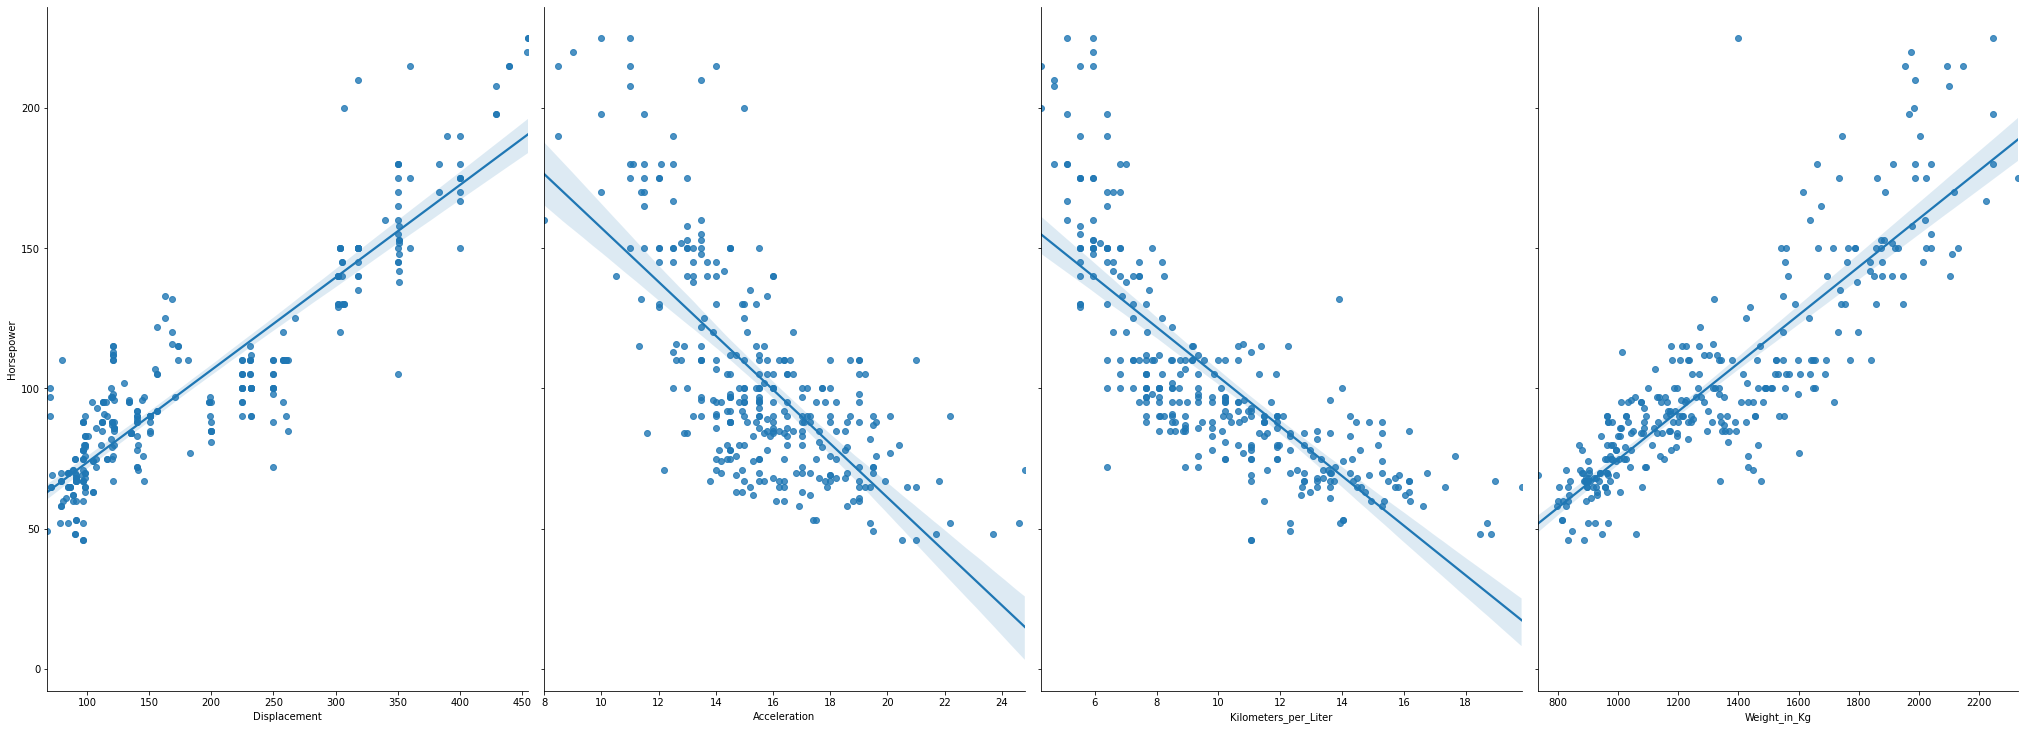

In [17]:
sns.pairplot(train_set, x_vars=['Displacement', 'Acceleration', 'Kilometers_per_Liter', 'Weight_in_Kg'], y_vars='Horsepower', 
             size=10, aspect = 0.7, kind='reg')

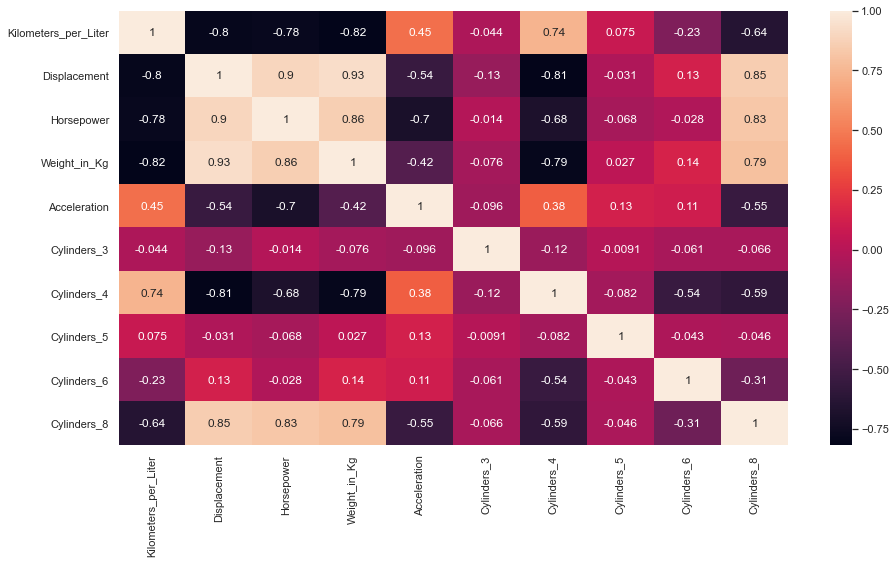

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train_set.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7980A4C10>,
      dtype=object)

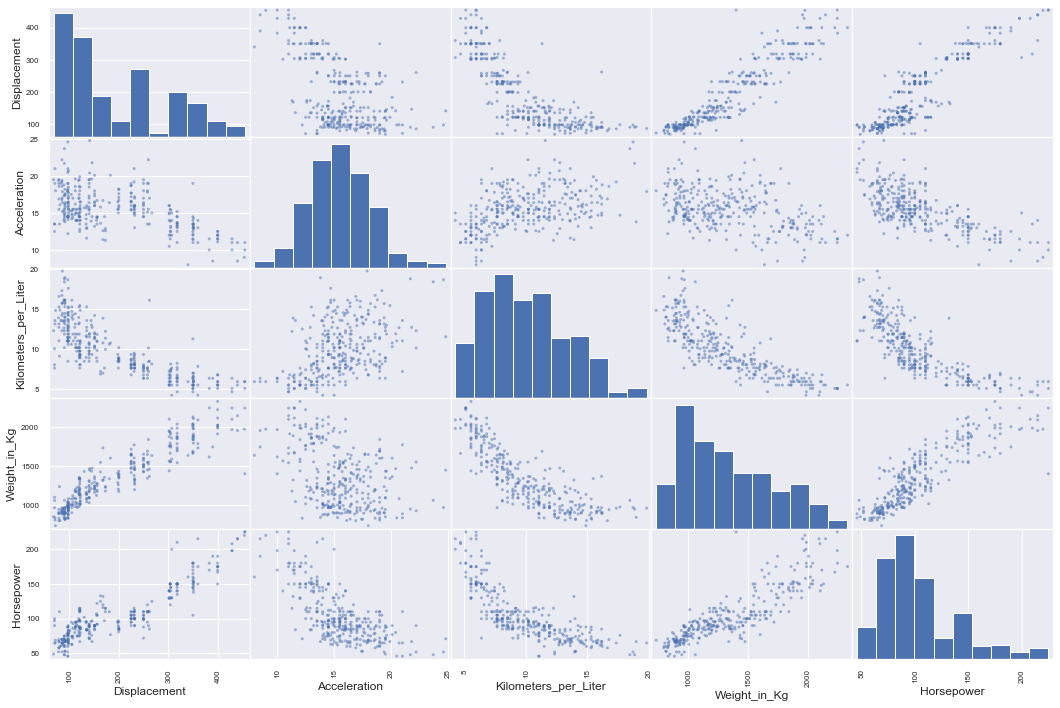

In [19]:
scatter_matrix(train_set[['Displacement', 'Acceleration', 'Kilometers_per_Liter', 'Weight_in_Kg','Horsepower']], figsize=(18, 12))

#### From the scatter matrix we can infer that there is not strong connection between the Cylinders and the other features of the vehicles

### Standard deviation of HorsePower, Displacement, Kilometer_per_Liter, Wieght_in_Kg

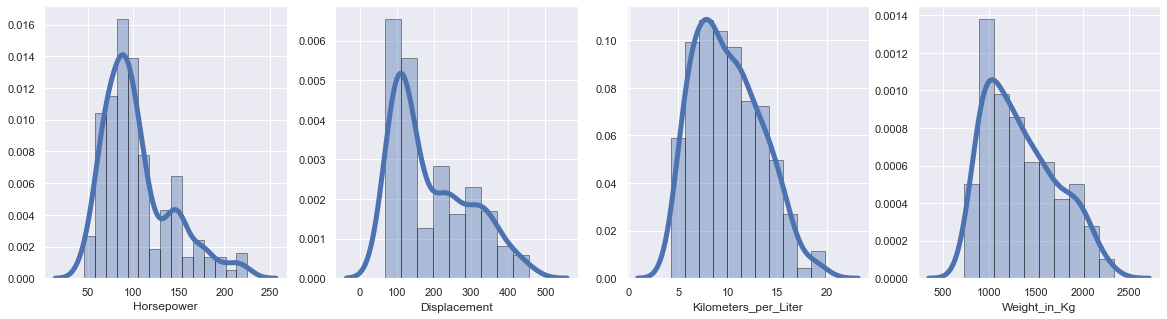

In [20]:
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(train_set['Horsepower'], hist=True, kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[0])

sns.distplot(train_set['Displacement'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[1])

sns.distplot(train_set['Kilometers_per_Liter'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[2])
sns.distplot(train_set['Weight_in_Kg'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'color': "b", 'linewidth': 5},
             ax = axes[3])

#### From the Standard deviation we can infer that most data is close to the mean, but the Horsepower and Displacement that spread a bit more

# building 3 different models for Regression

### Splitting the train set to x,y of the set.

In [21]:
x_train = train_set[['Displacement', 'Acceleration', 'Kilometers_per_Liter', 'Weight_in_Kg','Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8']]
y_train = train_set['Horsepower']

In [22]:
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)


### Linear Regression model

In [23]:
linear_reg = linear_model.LinearRegression()

In [24]:
l_scores = cross_val_score(linear_reg, x_train, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[0.9018421  0.9367192  0.8014367  0.90324656]


0.8858111402014692

### KNeighborsRegressor model

In [25]:
knn_reg = KNeighborsRegressor()
knn_scores = cross_val_score(knn_reg, x_train, y_train, scoring='r2', cv=folds)
print(knn_scores)
np.mean(knn_scores)

[0.82121308 0.82116429 0.74603055 0.80697381]


0.7988454306002863

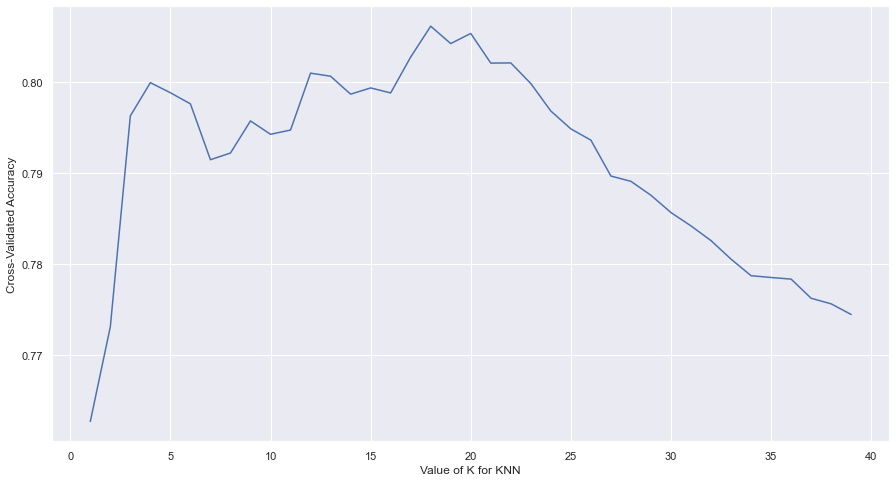

In [26]:
k_range = range(1, 40)
k_scores = []

for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_reg, x_train, y_train, cv=folds, scoring='r2')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Decision Tree model

In [46]:
params_dict = {"max_depth":range(2,15), "min_samples_leaf":range(2,15), "min_samples_split": range(2,15)}
dt_reg = DecisionTreeRegressor(random_state=42)

grid = GridSearchCV(dt_reg, params_dict, cv=folds)
grid.fit(x_train,y_train)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.8835927415997871


In [48]:
dt_reg_best = DecisionTreeRegressor(max_depth=8,min_samples_leaf=3,min_samples_split=10)
dt_scores = cross_val_score(dt_reg_best, x_train, y_train, scoring='r2', cv=folds)
print(dt_scores)
np.mean(dt_scores)

[0.89491183 0.92250923 0.81589284 0.885202  ]


0.879628975288575

#### We see that the highest score is from the gridsearch and not the cross validation

# Selecting the model with the highest(DecisionTreeRegressor model) accuracy and trying to improve it's accuracy

### Log Transformation for Horsepower, Displacement, Kilometers_per_Gallon, Weight_in_Kg

#### we can infer from those plots that the Log Transformation helped us normalize the data to make the model more accurate.

#### ploting the log graphs of Horsepower, Displacement, Kilometers_per_Gallon, Weight_in_Kg

### splitting the train set to x_train y_train

In [29]:
X_train = train_set[['Displacement', 'Acceleration', 'Kilometers_per_Liter', 'Weight_in_Kg','Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8']]
Y_train = train_set['Horsepower']

#### Let's check the score of the decision tree model

In [30]:
dt = DecisionTreeRegressor(random_state=42)
new_grid = GridSearchCV(dt, params_dict, cv=folds)
new_grid.fit(X_train,Y_train)

print(new_grid.best_params_)
print(new_grid.best_score_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.8835927415997871


#### We tried to improve the DecisionTreeRegressor model and it didn't impact the score much, so let's try to improve the next highest scored model(LinearRegression model)

### calculating the score of the model

In [31]:
scores = cross_val_score(linear_reg, X=X_train, y=Y_train, scoring='r2', cv=folds)
print(scores)
np.mean(scores)

[0.9018421  0.9367192  0.8014367  0.90324656]


0.8858111402014692

#### We can see that the model accuracy did improved and it's higher than the DecisionTreeRegressor model so we will choose the Linear Regression model to be our final model.

# Testing our model

### splitting the test set to x_test y_test

In [32]:
X_test = test_set[['Displacement', 'Acceleration', 'Kilometers_per_Liter', 'Weight_in_Kg','Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8']]
Y_test = test_set['Horsepower'].copy()

### calculating the final score of our Linear Regression model

In [33]:
model = linear_reg
model.fit(X_train, Y_train)
final_pred = model.predict(X_test)
final_score = r2_score(Y_test,final_pred)
final_score

0.8695774579272793

# Semseter B

We will try to make more conclusions about our data from Semeter A, In addition we are going to improve our model to have better predictions.

In [339]:
country_groups = df.groupby(by='Origin')
list(country_groups)

[('Europe',
                               Name  Kilometers_per_Liter  Displacement  \
  10           citroen ds-21 pallas                   NaN         133.0   
  25   volkswagen 1131 deluxe sedan             11.053744          97.0   
  26                    peugeot 504             10.628600         110.0   
  27                    audi 100 ls             10.203456         107.0   
  28                       saab 99e             10.628600         104.0   
  ..                            ...                   ...           ...   
  366     peugeot 505s turbo diesel             11.946546         141.0   
  367                     saab 900s                   NaN         121.0   
  368                  volvo diesel             13.051921         145.0   
  383           volkswagen rabbit l             15.305184         105.0   
  402                     vw pickup             18.706336          97.0   
  
       Horsepower  Weight_in_Kg  Acceleration        Year  Origin  Cylinders_3  \
  1

In [340]:
described_cylinders = df.describe()[['Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8']]
arr = np.array(list(described_cylinders.iloc[1]))*100
arr

array([ 0.98522167, 50.98522167,  0.73891626, 20.68965517, 26.60098522])

<BarContainer object of 5 artists>

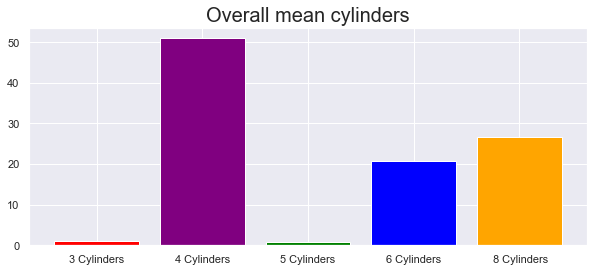

In [341]:
names = ['3 Cylinders' , '4 Cylinders' , '5 Cylinders' , '6 Cylinders', ' 8 Cylinders']
New_Colors = ['red','purple','green','blue','orange']
plt.figure(figsize=(10, 4))
plt.title('Overall mean cylinders', fontsize=20)
plt.bar(names,np.array(list(described_cylinders.iloc[1]))*100,color = New_Colors)

In [342]:
lst=[]
for i in ['Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8']:
    lst.append(country_groups[i].mean())

In [343]:
europe = []
japan = []
USA = []
for i in range(len(lst)):
    europe.append(lst[i][0])
    japan.append(lst[i][1])
    USA.append(lst[i][2])

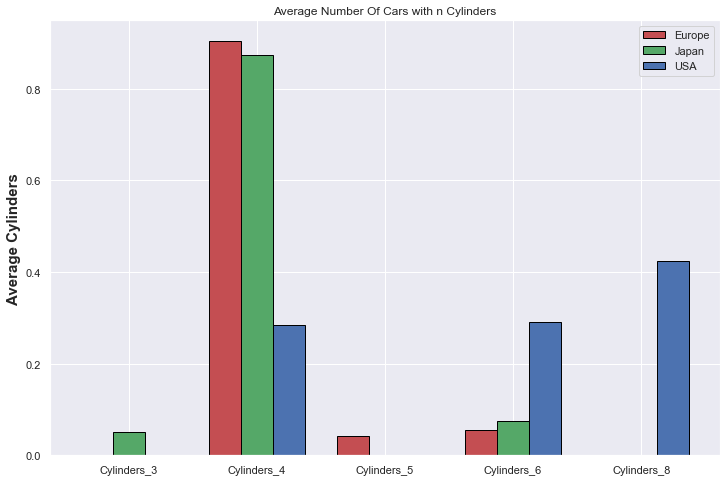

In [344]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
# Set position of bar on X axis
br1 = np.arange(len(europe))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, europe, color ='r', width = barWidth,
        edgecolor ='black', label ='Europe')
plt.bar(br2, japan, color ='g', width = barWidth,
        edgecolor ='black', label ='Japan')
plt.bar(br3, USA, color ='b', width = barWidth,
        edgecolor ='black', label ='USA')
 
# Adding Xticks
plt.ylabel('Average Cylinders', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(europe))],
        ['Cylinders_3','Cylinders_4','Cylinders_5','Cylinders_6','Cylinders_8'])
plt.title("Average Number Of Cars with n Cylinders")
plt.legend()
plt.show()

From the chart above we can conclude that most of the cars (50%) in our dataset are 4 cylinder cars (mostly family vehicles)

In [345]:
Average_accelaration = list(country_groups['Acceleration'].mean())
Avg_hp = list(country_groups['Horsepower'].mean())

Text(0.5, 1.0, 'Average Acceleration By Origin')

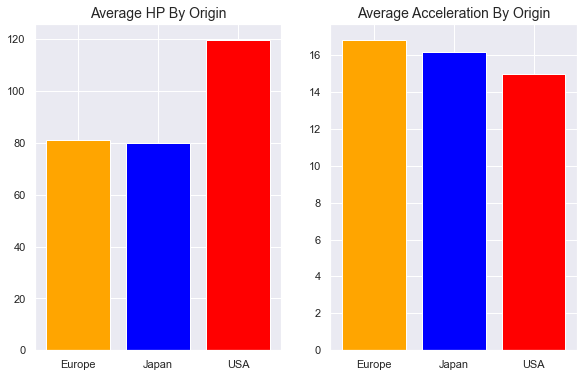

In [346]:
names = ['Europe' , 'Japan' , 'USA']
New_Colors = ['orange','blue','red']
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.bar(names,Avg_hp , color=New_Colors)
plt.title('Average HP By Origin', fontsize=14)
plt.subplot(132)
plt.bar(names,Average_accelaration , color=New_Colors)
plt.title('Average Acceleration By Origin', fontsize=14)

From the chart above we can conclude that the cars with better acceleration are originated in USA (smaller is better), these cars are with more horsepower(meaning, more cylinders in the engine). 

In [347]:
names = df['Name'].str.split(' ')

In [348]:
lst = []
for i in names:
    lst.append(i[0])
names_series = pd.DataFrame(lst)
names_series = names_series.join(df['Horsepower'])
names_series.rename({0:'Name'},axis=1, inplace=True)

# Improving our model : Scaling our data so the model will preform better

In [350]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Evaluating our model by using cross validation on the scaled training:

In [351]:
l_scores = cross_val_score(linear_reg, X_train_scaled, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[0.9018421  0.9367192  0.8014367  0.90324656]


0.8858111402014692

## We will use Voting Regressor, an ensemble method to improve our model:

In [352]:
voting = VotingRegressor(estimators=[('mdl1', linear_reg), ('mdl2', dt_reg_best) , ('mdl3',knn_reg)])
l_scores = cross_val_score(voting, X_train_scaled, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[0.91821564 0.94208096 0.8358893  0.90067568]


0.8992153945547738

## Using AdaBoost to improve the Voting Regressor accuracy

In [353]:
ada_reg = AdaBoost(voting, learning_rate = 0.025,n_estimators = 1000000)
l_scores = cross_val_score(ada_reg, X_train_scaled, y_train, scoring='r2', cv=folds)
print(l_scores)
np.mean(l_scores)

[0.92282643 0.93594958 0.87197561 0.91047912]


0.9103076854256454

## Scaling the test set:

In [355]:
X_test_scaled = scaler.transform(X_test)
model = ada_reg
model.fit(X_train_scaled, Y_train)
final_pred = model.predict(X_test_scaled)
final_score = r2_score(Y_test,final_pred)
final_score

0.8858933290023366

### We have improved the model's accuracy by 3% :)